In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [13]:
data = {
    'Student_ID': range(1, 21),
    'Name': ['komal', 'rohit', 'shailesh', 'vedant', 'pranjal', 'om', 'prajakta', 'kartika', 'omkar', 'shubham', 
             'sneha', 'pratik', 'Mia', 'Nina', 'pawan', 'riya', 'chaitanya', 'khushi', 'pranav', 'mansi'],
    'Age': [20, 21, 22, 23, 20, 21, 22, 18, 20, 21, 22, 23, 20, 20, 21, 22, 19, 23, 20, 21],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
               'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Course': ['Math', 'Science', 'Engineering', 'Arts', 'Literature', 'Math', 'Science', 'Engineering', 
               'Math', 'Literature', 'Arts', 'Science', 'Math', 'Arts', 'Literature', 'Engineering', 
               'Math', 'Literature', 'Science', 'Arts'],
    'Grade': [85, 92, 78, 88, 91,np.nan , 80, 75, 89, 90, 82, 87,np.nan , 95, 91, 85, 87, 93,np.nan , 88],
    'Attendance': [90, 85, 95, 80, 88, 92,np.nan , 85, 90, 80, 75, 85, 92, 95, 90,np.nan , 82, 90, 95, 88],
    'Study_Hours': [15, 10, 20, 12, 18, 14, 16, 10, 15, 12, 18, 14,np.nan, 13, 19, 17, 15,np.nan , 12, 14]
}

In [14]:
stud_data = pd.DataFrame(data)

In [15]:
stud_data.head()

,Student_ID,Name,Age,Gender,Course,Grade,Attendance,Study_Hours
0,1,komal,20,Female,Math,85.0,90.0,15.0
1,2,rohit,21,Male,Science,92.0,85.0,10.0
2,3,shailesh,22,Male,Engineering,78.0,95.0,20.0
3,4,vedant,23,Male,Arts,88.0,80.0,12.0
4,5,pranjal,20,Female,Literature,91.0,88.0,18.0


In [16]:
stud_data.isnull().sum()

Student_ID     0
Name           0
Age            0
Gender         0
Course         0
Grade          3
Attendance     2
Study_Hours    2
dtype: int64

In [17]:
stud_data.describe()

,Student_ID,Age,Grade,Attendance,Study_Hours
count,20.00000,20.000000,17.000000,18.000000,18.000000
mean,10.50000,20.950000,86.823529,87.611111,14.666667
std,5.91608,1.356272,5.468493,5.699731,2.930569
min,1.00000,18.000000,75.000000,75.000000,10.000000
25%,5.75000,20.000000,85.000000,85.000000,12.250000
50%,10.50000,21.000000,88.000000,89.000000,14.500000
75%,15.25000,22.000000,91.000000,91.500000,16.750000
max,20.00000,23.000000,95.000000,95.000000,20.000000


In [18]:
stud_data.dtypes

Student_ID       int64
Name            object
Age              int64
Gender          object
Course          object
Grade          float64
Attendance     float64
Study_Hours    float64
dtype: object

In [19]:
stud_data['Grade'].fillna(stud_data['Grade'].median(), inplace=True)             # Fill missing with median
stud_data['Study_Hours'].fillna(stud_data['Study_Hours'].median(), inplace=True) 
stud_data['Attendance'].fillna(stud_data['Attendance'].mode()[0], inplace=True)  # Fill missing with mode

In [20]:
stud_data

,Student_ID,Name,Age,Gender,Course,Grade,Attendance,Study_Hours
0,1,komal,20,Female,Math,85.0,90.0,15.0
1,2,rohit,21,Male,Science,92.0,85.0,10.0
2,3,shailesh,22,Male,Engineering,78.0,95.0,20.0
3,4,vedant,23,Male,Arts,88.0,80.0,12.0
4,5,pranjal,20,Female,Literature,91.0,88.0,18.0
5,6,om,21,Male,Math,88.0,92.0,14.0
6,7,prajakta,22,Female,Science,80.0,90.0,16.0
7,8,kartika,18,Female,Engineering,75.0,85.0,10.0
8,9,omkar,20,Male,Math,89.0,90.0,15.0
9,10,shubham,21,Male,Literature,90.0,80.0,12.0


In [21]:
stud_data.isnull().sum()

Student_ID     0
Name           0
Age            0
Gender         0
Course         0
Grade          0
Attendance     0
Study_Hours    0
dtype: int64

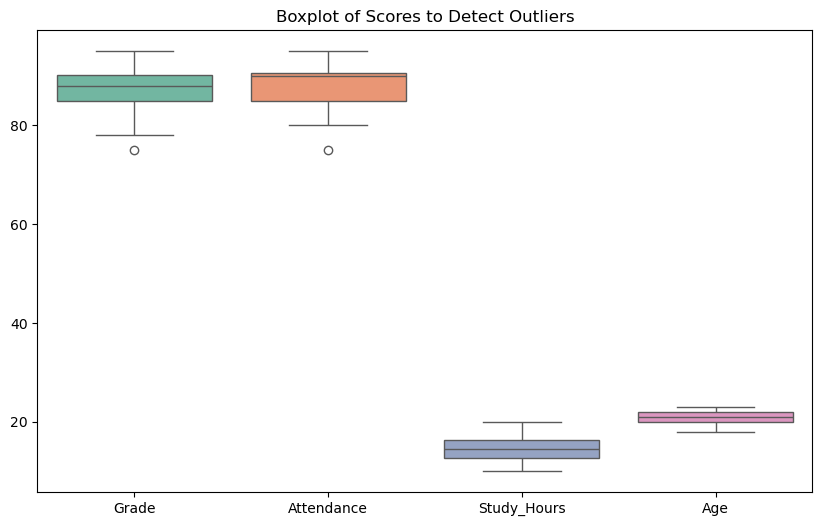

In [22]:
#box plot

plt.figure(figsize=(10, 6))
sns.boxplot(data=stud_data[['Grade', 'Attendance', 'Study_Hours' , 'Age']], palette='Set2')
plt.title("Boxplot of Scores to Detect Outliers")
plt.show()

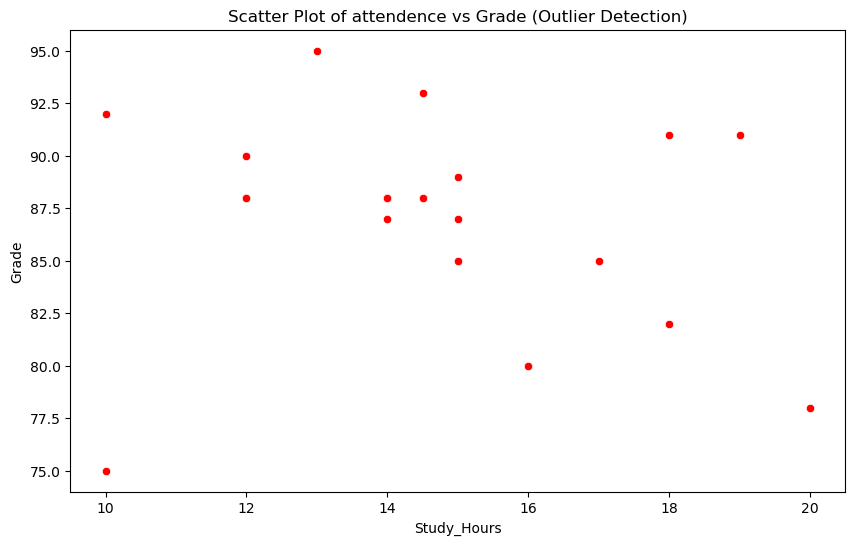

In [23]:
#scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=stud_data['Study_Hours'], y=stud_data['Grade'], color='red')
plt.title("Scatter Plot of attendence vs Grade (Outlier Detection)")
plt.xlabel("Study_Hours")
plt.ylabel("Grade")
plt.show()

In [24]:
#IQR

Q1 = stud_data['Study_Hours'].quantile(0.25)
Q3 = stud_data['Study_Hours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
lower_bound

7.5

In [26]:
upper_bound

21.5

In [27]:
IQR

3.5

In [28]:
# Check for skewness in Study_Hours
study_hours = stud_data['Study_Hours'].dropna()
skewness = stats.skew(study_hours)

skewness

0.16205823735454428

In [29]:
# For example, if skewness is positive and transformation is needed:

# Square root transformation
stud_data['Study_Hours_sqrt'] = np.sqrt(stud_data['Study_Hours'].fillna(0))

# Alternatively, log transformation (make sure values > 0 by adding a small constant if needed)
stud_data['Study_Hours_log'] = np.log(stud_data['Study_Hours'].fillna(0) + 1)  # Adding 1 to avoid log(0)

In [30]:
# Check skewness after transformation
study_hours_sqrt = stud_data['Study_Hours_sqrt']
study_hours_log = stud_data['Study_Hours_log']

# Skewness of the transformed data
skew_sqrt = stats.skew(study_hours_sqrt)
skew_log = stats.skew(study_hours_log)

skew_sqrt, skew_log

(-0.032912414706404554, -0.20635352385236058)

In [31]:
from scipy.stats import skew

In [32]:
# Calculate skewness for "Grade" column (excluding NaN values)
grade_skewness = skew(stud_data["Grade"].dropna())

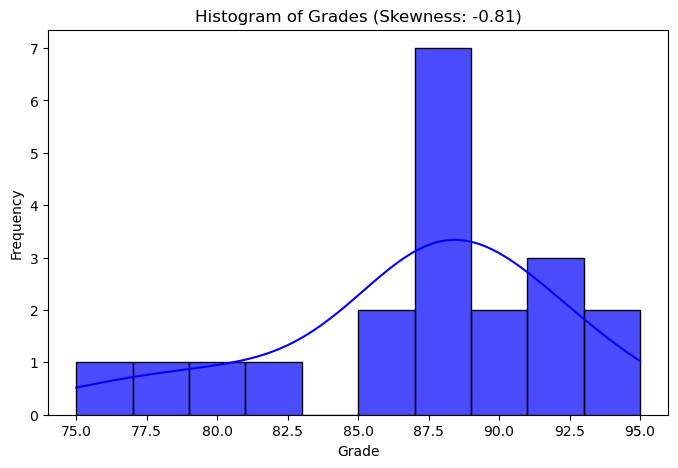

In [33]:
# Plot histogram for "Grade"
plt.figure(figsize=(8, 5))
sns.histplot(stud_data["Grade"].dropna(), bins=10, kde=True, color="blue", edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title(f"Histogram of Grades (Skewness: {grade_skewness:.2f})")

# Show the plot
plt.show()